# Introduction

In [ ]:
from fastai.vision.all import *

In [ ]:
def get_dls(size, bs, workers=None):
    path = URLs.IMAGEWANG_160 if size <= 160 else URLs.IMAGEWANG
    source = untar_data(path)
    
    files = get_image_files(source)
    tfms = [[PILImage.create, ToTensor, RandomResizedCrop(size, min_scale=0.9)], 
            [parent_label, Categorize()]]
    
    dsets = Datasets(files, tfms=tfms, splits=RandomSplitter(valid_pct=0.1)(files))
    
    batch_tfms = [IntToFloatTensor]
    dls = dsets.dataloaders(bs=bs, num_workers=workers, after_batch=batch_tfms)
    return dls

In [ ]:
bs=64
resize, size = 160, 128

In [ ]:
dls = get_dls(resize, bs)

## SimCLR

In [ ]:
from self_supervised.simclr import *

In [ ]:
model = create_simclr_model(arch=xresnet34, n_in=3, pretrained=False)
learn = Learner(dls, model, loss_func=SimCLRLoss(temp=0.5), cbs=[SimCLR(size=size)])

In [ ]:
# for inspecting data augmentations
b = dls.one_batch()
learn._split(b)
learn('before_batch')

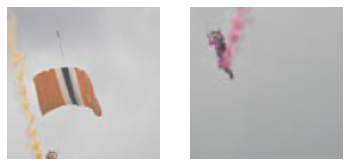

In [ ]:
learn.sim_clr.show_one()

In [ ]:
# learn.fit_flat_cos(100)

## BYOL

In [ ]:
from self_supervised.byol import *

In [ ]:
model = create_byol_model(arch=xresnet34, pretrained=False)
learn = Learner(dls, model, byol_loss, cbs=[BYOL(T=0.99, size=size)])

In [ ]:
# for inspecting data augmentations
b = dls.one_batch()
learn._split(b)
learn('before_fit')
learn('before_batch')

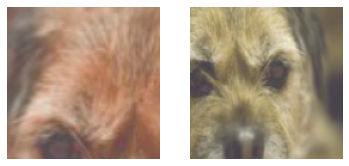

In [ ]:
learn.byol.show_one()

In [ ]:
# learn.fit_flat_cos(100)

## SwAV

In [ ]:
from self_supervised.swav import *

In [ ]:
model = create_swav_model(arch=xresnet34, n_in=3, pretrained=False)
learn = Learner(dls, model, SWAVLoss(),
                cbs=[SWAV(crop_sizes=[size,96], 
                          num_crops=[2,6],
                          min_scales=[0.25,0.2],
                          max_scales=[1.0,0.35])])

In [ ]:
b = dls.one_batch()
learn._split(b)
learn('before_batch')

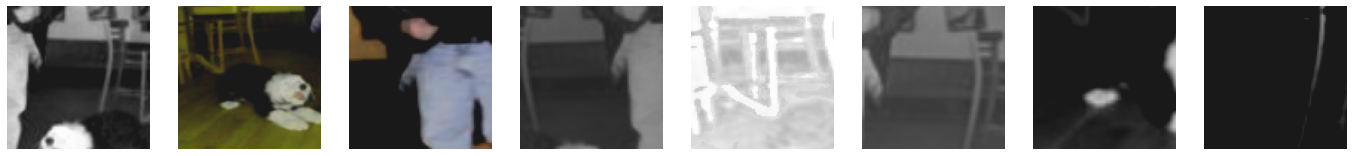

In [ ]:
learn.swav.show_one()